In [1]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed()

m = 1 # dimension
k_squared = 0.04
m_inv = 1.0
learning_rate = 0.0001
epochs = 10000
batch_size = 500
x_stddev = 5
test_averaging=100
decay = 1 - 1*1e-10

# x_train = np.zeros((epochs,1))
# for i in range(0,epochs):
#     x_train[i]=np.random.normal(scale = x_stddev)
# #     x_train[i]=np.random.uniform(-20,20,1)'module' object has no attribute 'norm'
w1=([[ 0.0901572 ,  0.2370918 ,  0.6920835 , -0.45759007, -0.22167274,
        -0.46439773, -0.45912468,  0.6203555 ,  0.0419175 ,  0.60444146,
         4.952244  ,  0.04192306,  0.53345317,  0.22216071, -0.24009007,
         6.301405  , -0.50758445, -0.21116066, -0.37131187, -0.22089699,
         0.04239784,  0.04331616, -0.18591626, -0.22142634, -0.4953288 ,
        -0.23889707,  0.67850924,  0.5476355 , -0.7077681 , -1.0123378 ,
         0.04195131,  0.22627208, -0.1888109 ,  0.21195143,  0.44928712,
         0.04276987, -0.20532611,  0.44252077, -0.04190878,  0.46343717,
        -0.22356562, -0.5474644 ,  0.04206235, -0.7823536 , -0.23852947,
         0.26123488, -0.2369954 , -0.25654712, -0.25827566,  0.5539032 ,
         0.22289808,  0.51685596,  1.0848937 , -0.6088887 , -0.04201594,
         0.21767725, -0.23810348, -0.4646694 , -0.53889185,  1.1317953 ,
         0.2089353 , -0.23368704, -5.6309223 , -0.2510263 ,  0.71514434,
         1.2417319 ,  5.88868   ,  0.4928691 ,  0.2434442 , -0.54655886,
         0.6717308 ,  0.44354093, -0.7333635 , -0.6745134 , -0.04279398,
        -0.7975697 ,  0.22850451, -0.25397167,  0.2451518 ,  1.1024855 ,
        -0.53172445,  0.04208738, -0.04233624,  0.8983515 ,  0.7710562 ,
        -0.2548618 , -0.21645324, -1.0170518 ,  0.9672949 , -0.23664552,
        -0.22946735,  0.63287175, -0.79163665, -0.52115196,  0.21819146,
        -0.22541553,  0.69617873,  0.73459744,  0.50693244, -0.24401082,
        -0.5940728 ,  1.3320855 , -1.140783  ,  0.23237722, -1.1244652 ,
        -5.6705046 ,  0.2540727 , -0.04189253, -0.20804366, -0.04187457,
        -0.21428825,  0.04335834,  0.96757776, -5.0284066 , -0.21626869,
        -0.540456  ,  0.51839244,  0.21898666,  0.9066629 ,  0.22020821,
        -0.50667083,  0.7983404 , -5.5656185 , -0.04212693,  0.25555643,
        -0.45822552,  0.24277431, -0.04205061,  0.15989499,  0.23738208,
         0.2237451 ,  0.24180941,  0.49051645, -0.45438182,  0.47147265,
        -0.04477705, -5.479455  ,  0.04174316,  0.2551995 ,  0.57939404,
        -0.6557258 , -0.04206115,  0.6763663 ,  0.23443314,  0.22873235,
        -0.04198467, -0.4861976 , -0.6498148 ,  0.44098404, -0.04172933]])
w2=([[-0.84504426],
       [-0.51247114],
       [-2.0340562 ],
       [-0.76634175],
       [ 0.61729795],
       [-0.58101785],
       [-0.6854419 ],
       [ 0.6577067 ],
       [-0.7736458 ],
       [-1.8916265 ],
       [-1.090016  ],
       [-0.873359  ],
       [ 0.42003942],
       [-0.47995704],
       [ 0.5497382 ],
       [-2.1801522 ],
       [-0.4831816 ],
       [ 0.5648663 ],
       [ 0.9415591 ],
       [ 0.78689337],
       [-0.91083336],
       [-0.9763873 ],
       [ 0.72957134],
       [ 0.5560705 ],
       [-0.4719117 ],
       [ 0.5045661 ],
       [ 0.66004866],
       [-1.5987552 ],
       [-0.4643787 ],
       [-1.9016262 ],
       [-0.96371204],
       [-0.611284  ],
       [ 0.65741754],
       [-0.5599199 ],
       [ 0.45351097],
       [-0.97737604],
       [ 0.7038435 ],
       [ 0.5943796 ],
       [ 0.9532466 ],
       [ 0.7460163 ],
       [ 0.5358916 ],
       [-0.44170648],
       [-0.9419488 ],
       [-0.67798716],
       [ 0.46497133],
       [-0.391163  ],
       [ 0.592325  ],
       [ 0.45341557],
       [ 0.43128943],
       [ 0.41603804],
       [-0.5674596 ],
       [ 0.38761157],
       [ 2.704492  ],
       [-0.80798954],
       [ 0.83548236],
       [-0.5111326 ],
       [ 0.6162054 ],
       [-0.7550416 ],
       [-0.4759281 ],
       [-2.5150294 ],
       [-0.50941396],
       [ 0.49656197],
       [-1.6215047 ],
       [ 0.47244617],
       [ 0.5376818 ],
       [ 3.9775271 ],
       [ 1.6411495 ],
       [ 0.45862758],
       [-0.47453666],
       [-0.45376387],
       [ 0.5765134 ],
       [ 0.56581146],
       [-1.1258857 ],
       [-1.0639522 ],
       [ 1.0760058 ],
       [-1.235642  ],
       [-0.53190786],
       [ 0.47500044],
       [-0.4640562 ],
       [ 2.372436  ],
       [-0.67921394],
       [-1.0515941 ],
       [ 1.1015248 ],
       [ 1.4750271 ],
       [-2.5024996 ],
       [ 0.43387246],
       [ 0.53801376],
       [-2.327031  ],
       [ 1.6461738 ],
       [ 0.4792684 ],
       [ 0.76675403],
       [ 0.4892529 ],
       [-1.1853842 ],
       [-0.38456675],
       [-0.80742   ],
       [ 0.45512152],
       [ 0.44872195],
       [-2.1801472 ],
       [ 0.67657053],
       [ 0.40404373],
       [-0.7937116 ],
       [ 0.77783364],
       [-2.4614215 ],
       [-0.6792038 ],
       [ 2.5339882 ],
       [-1.5957985 ],
       [-0.4930483 ],
       [ 0.9237745 ],
       [ 0.59356   ],
       [ 0.9956936 ],
       [ 0.47309944],
       [-0.9341501 ],
       [ 1.6710144 ],
       [ 1.1764897 ],
       [ 0.46367607],
       [-0.7061653 ],
       [ 0.46270266],
       [-0.8225886 ],
       [ 1.8290645 ],
       [-0.5919749 ],
       [-0.44208294],
       [-1.948723  ],
       [-1.3858926 ],
       [ 0.8691517 ],
       [-0.37294617],
       [-0.6558015 ],
       [-0.6871818 ],
       [ 1.0781469 ],
       [-0.87414324],
       [-0.47635847],
       [-0.5639866 ],
       [-0.47552544],
       [ 0.7286468 ],
       [-0.34246516],
       [ 0.6627983 ],
       [ 0.7922385 ],
       [-0.80032754],
       [-0.6089186 ],
       [-0.46824703],
       [ 0.40888965],
       [-0.56078476],
       [ 0.98349524],
       [ 0.48105317],
       [-0.5328922 ],
       [-0.70839876],
       [ 1.0339078 ],
       [-0.61342776],
       [-0.79129976],
       [ 0.48441455],
       [ 0.5570059 ]])

In [24]:



b1=([-1.49632066e-01,  2.16088206e-01,  3.65778732e+00, -1.21041000e+00,
       -1.35061651e-01, -1.29561055e+00, -1.22450840e+00, -2.32706118e+00,
       -2.15838999e-02,  3.23842049e+00,  9.99821246e-01,  5.85471094e-02,
        1.77022383e-01,  1.33129925e-01, -2.35600263e-01, -9.69530642e-01,
        7.31552601e-01, -9.77801457e-02, -1.28652573e+00,  2.19140470e-01,
        1.23102725e-01, -1.57810926e-01,  1.53959572e-01, -1.32225156e-01,
       -1.57481730e-01, -2.27377295e-01,  4.70594555e-01,  2.85312033e+00,
        3.12517256e-01,  5.74599028e+00, -2.24734023e-02,  1.56200081e-01,
       -7.49236792e-02,  9.45027769e-02, -9.54202712e-01, -1.19746946e-01,
        1.76245585e-01, -1.47855604e+00,  1.07089831e-02,  1.27336562e+00,
        2.21104607e-01, -1.81072652e-01,  8.26996788e-02, -5.77640235e-01,
       -2.25629151e-01,  3.77086610e-01, -2.16601476e-01, -3.45170379e-01,
       -3.56887221e-01, -5.90745807e-01, -2.19919547e-01, -1.86245930e+00,
        6.39037895e+00,  2.27631497e+00, -7.94772431e-02,  1.15748756e-01,
        3.03080708e-01, -1.28756618e+00, -1.78790972e-01, -5.63836622e+00,
        8.99272710e-02, -1.94928318e-01, -7.41466433e-02, -3.07720184e-01,
        2.70801663e-01,  7.34310913e+00,  8.29299539e-02, -7.81100869e-01,
        2.56538272e-01, -1.80862710e-01,  2.18636543e-01,  1.07038522e+00,
       -2.78851628e+00, -2.51557636e+00,  1.20577067e-01, -3.08366776e+00,
        1.66032478e-01, -3.27756613e-01,  2.67747581e-01, -6.31493044e+00,
       -1.79744363e+00, -4.68141548e-02,  7.84308538e-02, -5.00692749e+00,
        4.00230837e+00, -3.33558679e-01, -1.12384461e-01, -5.97595739e+00,
       -5.45763254e+00, -2.12760210e-01,  2.53413409e-01,  1.98413730e-01,
        4.21520996e+00,  6.86769903e-01, -2.12254256e-01, -1.46499500e-01,
        4.68130678e-01, -4.72452021e+00, -1.81595242e+00, -2.60216951e-01,
        2.21049786e+00, -1.94112194e+00,  6.55437994e+00, -2.68400759e-01,
        5.60166454e+00, -7.55500719e-02,  3.28553319e-01,  6.42770529e-03,
       -9.20422822e-02, -1.11987339e-02, -1.00595385e-01, -1.61407873e-01,
       -5.45945311e+00, -1.01744628e+00, -1.06990181e-01,  1.96982336e+00,
        1.70830369e-01, -2.16641054e-01,  5.29849386e+00,  1.28267542e-01,
        7.34108150e-01, -4.16245031e+00, -7.15808198e-02, -9.45318416e-02,
        3.37766856e-01, -1.21507788e+00, -3.34076196e-01,  4.01906781e-02,
       -1.60489708e-01,  2.17334837e-01,  1.42836973e-01,  2.45796412e-01,
        1.53452313e+00,  9.28530157e-01,  1.37115467e+00,  1.37233928e-01,
       -6.79805875e-02,  4.52714004e-02,  3.36023450e-01, -2.64137276e-02,
       -2.08564326e-01,  4.37483490e-02,  2.18686923e-01,  2.00063869e-01,
       -2.48323262e-01,  2.81832628e-02, -1.50140417e+00,  2.45667958e+00,
       -9.98386204e-01, -4.18332741e-02])
b2= ([-0.47102088])

w1_init = tf.constant_initializer(w1)
b1_init = tf.constant_initializer(b1)
w2_init = tf.constant_initializer(w2)
b2_init = tf.constant_initializer(b2)

In [3]:
# declare the training data placeholders
# input x - just one is x0
x0 = tf.placeholder(tf.float32, [None, 1])
# x1 = tf.placeholder(tf.float32, [None, 1])
# x1_noise = tf.placeholder(tf.float32, [None, 1])
# x2 = tf.placeholder(tf.float32, [None, 1])
# # now declare the output data placeholder
# u1 = tf.placeholder(tf.float32, [None, 1])
# u2 = tf.placeholder(tf.float32, [None, 1])

# y = tf.placeholder(tf.float32, [None, 2])

In [4]:
# # now declare the weights connecting the input to the hidden layer
# W1 = tf.Variable(tf.random_normal([1, 150], stddev=0.03), name='W1')
# b1 = tf.Variable(tf.random_normal([150]), name='b1')
# # and the weights connecting the hidden layer to the u1 output layer
# W2 = tf.Variable(tf.random_normal([150, 1], stddev=0.03), name='W2')
# b2 = tf.Variable(tf.random_normal([1]), name='b2')

# # declare weights connecting x1+z to a hidden layer
# W3 = tf.Variable(tf.random_normal([1, 30], stddev=0.03), name='W1')
# b3 = tf.Variable(tf.random_normal([30]), name='b3')
# # and the weights connecting the hidden layer to the u1 output layer
# W4 = tf.Variable(tf.random_normal([30, 1], stddev=0.03), name='W2')
# b4 = tf.Variable(tf.random_normal([1]), name='b4')


u1 = tf.Variable(tf.random_normal([1]))

In [5]:
# # calculate the output of the hidden layer
# hidden_out_1 = tf.add(tf.matmul(x0, W1), b1)
# hidden_out_1 = tf.nn.sigmoid(hidden_out_1)

# # # output layer
# u1 = tf.identity(tf.add(tf.matmul(hidden_out_1, W2), b2))
# # print(u1.get_shape())
# # x1 = u1 + x0

hidden_out_1 = tf.layers.dense(
  x0, 150, tf.nn.tanh, use_bias=True, kernel_initializer=w1_init, 
    bias_initializer=b1_init, name='firstlayer')
u1 = tf.layers.dense(
  hidden_out_1, m, activation=tf.identity, use_bias=True, kernel_initializer=w2_init, 
    bias_initializer=b2_init, name='secondlayer')

x1 = u1 + x0

# add noise to x1
z = tf.random_normal([1,1])
x1_noise = x1 + z

# hidden_out_2 = tf.add(tf.matmul(x1_noise, W3), b3)
# hidden_out_2 = tf.nn.sigmoid(hidden_out_2)
# u2 = tf.identity(tf.add(tf.matmul(hidden_out_2, W4), b4))


hidden_out_2 = tf.layers.dense(
  x1_noise, 30, tf.nn.sigmoid, use_bias=True)
u2 = tf.layers.dense(
  hidden_out_2, m, activation=tf.identity, use_bias=True)


x2 = x1 - u2

In [6]:
# wits_cost = tf.add(tf.multiply(m_inv,tf.multiply(k_squared, tf.norm(u1,'euclidean'))),
#                    tf.multiply(m_inv,tf.norm(x2,'euclidean')))
# wits_cost = tf.norm(u1)

wits_cost = (k_squared*tf.norm(u1)**2 + tf.norm(x2)**2) / batch_size


adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])


optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(wits_cost)

In [7]:
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()


('Epoch: ', 0, 'Cost: ', 26.898958)
('Epoch: ', 50, 'Cost: ', 16.161898)
('Epoch: ', 100, 'Cost: ', 10.743709)
('Epoch: ', 150, 'Cost: ', 8.25944)
('Epoch: ', 200, 'Cost: ', 6.677162)
('Epoch: ', 250, 'Cost: ', 5.4171243)
('Epoch: ', 300, 'Cost: ', 4.9425697)
('Epoch: ', 350, 'Cost: ', 4.472486)
('Epoch: ', 400, 'Cost: ', 4.202588)
('Epoch: ', 450, 'Cost: ', 3.7741868)
('Epoch: ', 500, 'Cost: ', 3.5861256)
('Epoch: ', 550, 'Cost: ', 3.2369895)
('Epoch: ', 600, 'Cost: ', 3.0534296)
('Epoch: ', 650, 'Cost: ', 2.8221247)
('Epoch: ', 700, 'Cost: ', 2.6349194)
('Epoch: ', 750, 'Cost: ', 2.6727493)
('Epoch: ', 800, 'Cost: ', 2.3874679)
('Epoch: ', 850, 'Cost: ', 2.4061363)
('Epoch: ', 900, 'Cost: ', 2.2461948)
('Epoch: ', 950, 'Cost: ', 1.9697511)
('Epoch: ', 1000, 'Cost: ', 2.3886914)
('Epoch: ', 1050, 'Cost: ', 2.1755362)
('Epoch: ', 1100, 'Cost: ', 1.9137051)
('Epoch: ', 1150, 'Cost: ', 1.84297)
('Epoch: ', 1200, 'Cost: ', 1.8314432)
('Epoch: ', 1250, 'Cost: ', 1.7327354)
('Epoch: ', 1300

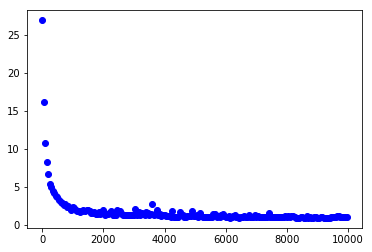

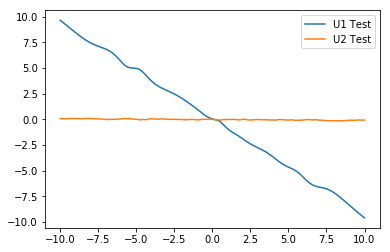

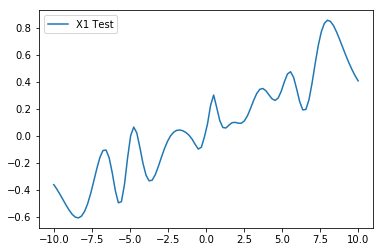

In [8]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    
    x_train = np.random.normal(size=epochs * batch_size * m, scale=x_stddev)
    
    for epoch in range(epochs):
#         x_batch = x_train[epoch].reshape(1,1)
        x_batch = x_train[epoch: epoch + (batch_size * m)].reshape((batch_size, m))
    #         c = sess.run(optimiser, feed_dict={x0:np.zeros((10,1))})#{x0: x_batch})
    #         sess.run(optimiser, feed_dict={x0: x_batch})
        _,cost = sess.run([optimizer, wits_cost], feed_dict={x0: x_batch,
                         adaptive_learning_rate: learning_rate * (decay**epoch)})
    #         print("Epoch:", (epoch + 1), "cost =", "{:.3f}")
    #         print(u1)
        if epoch % 50 == 0:
            print("Epoch: ", epoch, "Cost: ",cost)
            plt.plot(epoch, cost, 'bo')

    # Test over a continuous range of X
    x0_test = np.linspace(-2*x_stddev, 2*x_stddev, num=100)
    u1_test, u2_test, x1_test = np.zeros((1, 100)), np.zeros((1, 100)), np.zeros(
    (1, 100))

    for i in range(100):
        u1t, u2t, x1t = 0, 0, 0
        for _ in range(test_averaging):
          u1tmp, u2tmp, x1tmp = sess.run(
            [u1, u2, x1],
            feed_dict={x0: x0_test[i].reshape((1, 1))})

          u1t += u1tmp
          u2t += u2tmp
          x1t += x1tmp

        u1_test[0, i] = u1t / test_averaging
        u2_test[0, i] = -u2t / test_averaging
        x1_test[0, i] = x1t / test_averaging
    
    with tf.variable_scope('firstlayer', reuse=True): 
        w1_post = tf.get_variable('kernel').eval()
        b1_post = tf.get_variable('bias').eval()
    
    with tf.variable_scope('secondlayer', reuse=True):
        w2_post = tf.get_variable('kernel').eval()
        b2_post = tf.get_variable('bias').eval()

print(cost)
plt.show()


l1, = plt.plot(x0_test, u1_test[0], label="U1 Test")
l3, = plt.plot(x0_test, u2_test[0], label="U2 Test")
plt.legend(handles=[l1, l3])
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
# plt.savefig("figure_u_1.png
plt.show()

plt.clf()
l2, = plt.plot(x0_test, x1_test[0], label="X1 Test")
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
plt.legend(handles=[l2])
# plt.savefig("figure_x_1.png")
plt.show()

In [27]:
w1_post.shape
np.array(w1).shape

np.linalg.norm(b1_post - np.array(b1))
# np.linalg.norm(w1)

1.1566609391406795

In [25]:
type(b1)

list